In [4]:
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers 
from tensorflow.keras import Sequential
import tensorflow.keras 

## Importazione dataset, normalizzazione x_train e aggiunta bidimensionalita. Codifica one-hot per le etichette

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.dtype)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255 

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

print(x_train.shape, y_train.shape)

uint8
(60000, 28, 28, 1) (60000, 10)


## Creazione modello con moduli:
* Convoluzionale + Average pool + Convoluzionale + (flatten hai dati) + Dense + OutPut

## Compilazione modello 

In [11]:
model = Sequential()

model.add(
    layers.Conv2D(
        6,
        kernel_size=(5,5),
        strides = (1,1),
        activation = 'tanh',
        input_shape = (28, 28, 1),
        padding = 'same'
    )
)

model.add(
    layers.AveragePooling2D(
        pool_size=(2, 2), 
        strides=(2, 2), 
        padding='valid'
    )
)

model.add(
    layers.Conv2D(
        120,
        kernel_size=(5,5),
        strides=(1,1),
        activation= 'tanh',
        padding='valid',
    )
)

model.add(layers.Flatten())
model.add(layers.Dense(84, activation = 'tanh'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(
    loss= 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 120)       18120     
                                                                 
 flatten (Flatten)           (None, 12000)             0         
                                                                 
 dense (Dense)               (None, 84)                1008084   
                                                                 
 dense_1 (Dense)             (None, 10)                850       
                                                      

## Addestramento modello

In [12]:
hist = model.fit(x_train, y_train, epochs= 10, validation_data = (x_test, y_test), verbose = 2)

Epoch 1/10
1875/1875 - 54s - loss: 0.2522 - accuracy: 0.9267 - val_loss: 0.1927 - val_accuracy: 0.9432 - 54s/epoch - 29ms/step
Epoch 2/10
1875/1875 - 60s - loss: 0.1910 - accuracy: 0.9437 - val_loss: 0.1892 - val_accuracy: 0.9420 - 60s/epoch - 32ms/step
Epoch 3/10
1875/1875 - 60s - loss: 0.1789 - accuracy: 0.9467 - val_loss: 0.1612 - val_accuracy: 0.9523 - 60s/epoch - 32ms/step
Epoch 4/10
1875/1875 - 61s - loss: 0.1664 - accuracy: 0.9500 - val_loss: 0.1584 - val_accuracy: 0.9544 - 61s/epoch - 32ms/step
Epoch 5/10
1875/1875 - 61s - loss: 0.1578 - accuracy: 0.9530 - val_loss: 0.1526 - val_accuracy: 0.9534 - 61s/epoch - 32ms/step
Epoch 6/10
1875/1875 - 62s - loss: 0.1503 - accuracy: 0.9544 - val_loss: 0.1414 - val_accuracy: 0.9565 - 62s/epoch - 33ms/step
Epoch 7/10
1875/1875 - 58s - loss: 0.1374 - accuracy: 0.9590 - val_loss: 0.1386 - val_accuracy: 0.9583 - 58s/epoch - 31ms/step
Epoch 8/10
1875/1875 - 58s - loss: 0.1379 - accuracy: 0.9576 - val_loss: 0.1312 - val_accuracy: 0.9582 - 58s/ep

## Risultati di addestramento 

In [13]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 2s 7ms/step - loss: 0.1254 - accuracy: 0.9613
Test loss 0.1254, accuracy 96.13%


## Illustrazione risultati di addestramento 

Text(0, 0.5, 'loss')

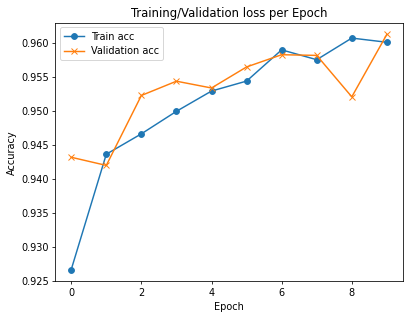

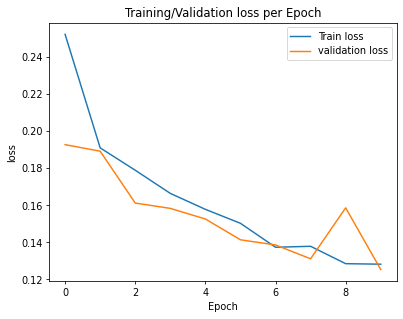

In [26]:
f, ax = plt.subplots(dpi = 70)
ax.plot(hist.history['accuracy'],'o-')
ax.plot(hist.history['val_accuracy'],'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

f2, ax2 = plt.subplots( dpi = 70)
ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.legend(['Train loss', 'validation loss'], loc=0)
ax2.set_title('Training/Validation loss per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('loss')

## Numero risultati correttamente identificati con le predizioni del modello 

In [28]:
start, end = 0, 5000

prediction = model.predict(x_test[start:end])

length = end-start
success = 0


classes = np.argmax(prediction, axis=1)


for i in range(0, len(classes)):
  # print("prediction -> ", classes[i])
  # print("label      -> ", np.argmax(y_test[i+start]))
  # print("\n")
  if classes[i] == np.argmax(y_test[i+start]):
    success +=1

print("Risultati: {} correttamente identificate su {} ({:.2f}%)".format(
    success,
    length,
    success/length*100
    )
)

157/157 [==============================] - 1s 7ms/step
Risultati: 4754 correttamente identificate su 5000 (95.08%)
